<a href="https://colab.research.google.com/github/roheth286/EDA-AIR-POLLUTION/blob/main/EDA_AIR_POLLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI/ML Task**
Perform data preprocessing on an air quality dataset by handling missing values, scaling numerical features, encoding categorical data, engineering time-based features, detecting and handling outliers, and conducting exploratory data analysis (EDA) to understand pollutant trends and sensor behavior.

---



Step-by-Step Breakdown:

*  Data Preparation

  1. Loaded the air quality dataset and inspected its structure.

  2. Handled missing values using appropriate imputation techniques.

  3. Scaled numerical features and encoded categorical variables.

  4. Extracted time-based features to enhance analysis.

*  Outlier Detection & Handling

  1. Identified potential outliers using statistical methods (IQR, Z-score).

  2. Applied techniques to manage outliers for accurate modeling.

* Exploratory Data Analysis (EDA)

  1. Summary statistics to understand dataset distribution.

  1. Box plots to visualize pollutant variations and detect anomalies.
  2. Histograms to examine the distribution of key pollutants.

  4. Scatter plots to analyze relationships between sensor readings.



# **Dataset of Air Quality**


---

Save the dataset to your local system and upload it when prompted in the import dataset cell.

Link: https://docs.google.com/spreadsheets/d/19QBcrLEC5xnAqHAN9Mc5ThDzgARB9Lv9/edit?usp=drive_link&ouid=104903737782903117851&rtpof=true&sd=true

# **Import necessary libraries**



---



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import files
import pandas as pd
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

# **Load the Dataset**



---



1.   User prompt to upload the .xlxs file.
2.   Use pandas to read the data into a DataFrame.
3.   Display basic info and the first few rows.



In [ ]:

# Upload the file
uploaded = files.upload()

# Get the filename dynamically
filename = list(uploaded.keys())[0]

# Load the dataset (since it's an Excel file)
df = pd.read_excel(filename, engine='openpyxl')  # 'openpyxl' ensures proper reading

# Display the first few rows
df.head()


Saving Copy of AirQualityUCI.xlsx to Copy of AirQualityUCI.xlsx


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


# **Handle Missing Values**



---

In this section, we handled missing values to improve data quality and ensure consistency for further analysis.

1. Identify missing values (tagged as -200).

2. Choose an imputation method

3. Apply the chosen method and verify that missing values are handled.


In [ ]:

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Replace -200 with NaN for easier handling
df.replace(-200, pd.NA, inplace=True)

# Handle missing values
# Fill numerical columns with their mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with their mode (most frequent value)
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nMissing values after filling:")
print(df.isnull().sum())

# Remove duplicate rows
print("\nNumber of duplicate rows before removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after removal:", df.duplicated().sum())

print(df.info())

print("\n Dataset has no missing values")


Missing values per column:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Missing values after filling:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]


<ipython-input-3-5afd842a49f1>:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


#  **Feature Scaling & Encoding**

---
We will scale numerical features for consistency and encode categorical features to make them machine-readable.
  1. Identify numerical and categorical features.
  2.Scale numerical features using Standardization  (Z-score normalization)  .
  3.No categorical encoding needed here because all features are numerical.





In [ ]:

# Selecting only numerical features (excluding Date & Time)
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
df[num_features] = scaler.fit_transform(df[num_features])

# Display the first few rows to verify
df.head()



,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,0.471444,1.239169,0.881711,0.262684,0.419456,-0.238675,0.878353,0.061929,0.690998,0.643203,-0.528542,-0.017635,-0.637158
1,2004-03-10,19:00:00,0.039317,0.923532,0.396646,-0.076323,0.073227,-0.545403,1.345122,-0.411764,0.298406,-0.109119,-0.563100,-0.086852,-0.717695
2,2004-03-10,20:00:00,0.183359,1.434841,0.090289,-0.130812,0.014091,-0.409079,1.211050,0.084486,0.285884,0.150149,-0.724371,0.282792,-0.655915
3,2004-03-10,21:00:00,0.183359,1.311381,-0.011830,-0.099296,0.048428,-0.209463,1.020370,0.264941,0.372063,0.479489,-0.828045,0.637708,-0.564877
4,2004-03-10,22:00:00,-0.248769,0.830355,-0.382012,-0.469141,-0.381736,-0.409079,1.469262,0.129600,0.095849,0.241880,-0.810766,0.612672,-0.559681


#  **Feature Engineering**

---
We will extract useful time-based features (hour, day, month) from the Date and Time columns to enhance predictive modeling.

1. Converts Date and Time into a proper datetime format.

2. Extracts Hour, Day of the Week, and Month from the datetime column.

3. Creates a RushHour binary feature (1 if time is 7-9 AM or 5-7 PM, else 0).

4. Creates a Workday vs. Weekend binary feature (1 if Monday-Friday, else 0)
    
5. Assigns a Seasonal label (Winter, Spring, Summer, Fall) based on the Month.

6. Computes Sensor Bias (difference between sensor readings and ground truth values) to quantify sensor inaccuracies and drift over time.

7. Pollution Accumulation Index (PAI): A weighted sum of past pollutant values to track pollutant buildup over time.(Also removes the first three rows to handle NaN values caused by shifting operations.)

8. Air Quality Deviation (AQD): Difference between current pollutant levels and their monthly average to detect anomalies.


9. Shows changes made



In [ ]:
# Ensure 'Date' and 'Time' are strings before concatenation
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), format='%Y-%m-%d %H:%M:%S')

# Extract Hour, Day of the Week, and Month
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['Datetime'].dt.month

# Create Rush Hour Feature (1 if 7-9 AM or 5-7 PM, else 0)
df['RushHour'] = df['Hour'].apply(lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 19) else 0)

# Create Workday vs. Weekend Feature (1 if Monday-Friday, else 0)
df['IsWorkday'] = df['DayOfWeek'].apply(lambda x: 1 if x < 5 else 0)

# Create Seasonal Feature
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# Compute sensor bias (sensor reading - ground truth)
df['CO_sensor_bias'] = df['PT08.S1(CO)'] - df['CO(GT)']
df['NOx_sensor_bias'] = df['PT08.S3(NOx)'] - df['NOx(GT)']
df['NO2_sensor_bias'] = df['PT08.S4(NO2)'] - df['NO2(GT)']
df['NMHC_sensor_bias'] = df['PT08.S2(NMHC)'] - df['NMHC(GT)']

# Pollution Accumulation Index (PAI) for all pollutants
pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'NMHC(GT)']
for pollutant in pollutants:
    df[f'PAI_{pollutant}'] = (0.7 * df[pollutant].shift(1)) + (0.2 * df[pollutant].shift(2)) + (0.1 * df[pollutant].shift(3))

# Air Quality Deviation from Monthly Average for all pollutants
for pollutant in pollutants:
    df[f'MonthlyAvg_{pollutant}'] = df.groupby('Month')[pollutant].transform('mean')
    df[f'AQD_{pollutant}'] = df[pollutant] - df[f'MonthlyAvg_{pollutant}']

# Drop intermediate monthly average columns if not needed
df.drop(columns=[f'MonthlyAvg_{pollutant}' for pollutant in pollutants], inplace=True)

# Remove the first three rows to avoid NaN issues
df = df.iloc[3:].reset_index(drop=True)

# Display first few rows to check the new features
df[['Datetime', 'Hour', 'RushHour', 'IsWorkday', 'Season',
    'CO_sensor_bias', 'NOx_sensor_bias', 'NO2_sensor_bias', 'NMHC_sensor_bias',
    'PAI_CO(GT)', 'PAI_C6H6(GT)', 'PAI_NOx(GT)', 'PAI_NO2(GT)', 'PAI_NMHC(GT)',
    'AQD_CO(GT)', 'AQD_C6H6(GT)', 'AQD_NOx(GT)', 'AQD_NO2(GT)', 'AQD_NMHC(GT)']].head()



,Datetime,Hour,RushHour,IsWorkday,Season,CO_sensor_bias,NOx_sensor_bias,NO2_sensor_bias,NMHC_sensor_bias,PAI_CO(GT),PAI_C6H6(GT),PAI_NOx(GT),PAI_NO2(GT),PAI_NMHC(GT),AQD_CO(GT),AQD_C6H6(GT),AQD_NOx(GT),AQD_NO2(GT),AQD_NMHC(GT)
0,2004-03-10 21:00:00,21,0,1,Spring,1.128022,1.229833,0.107123,0.060258,0.183359,-0.080565,-0.419304,-0.017020,0.230702,0.065244,0.001670,-0.323571,-0.012554,-0.258809
1,2004-03-10 22:00:00,22,0,1,Spring,1.079124,1.878342,-0.033751,0.000276,0.168955,-0.103302,-0.282980,0.161179,0.049441,-0.366884,-0.368175,-0.523187,-0.147895,-0.628991
2,2004-03-10 23:00:00,23,0,1,Spring,1.016630,2.605210,0.131596,-0.159026,-0.119130,-0.361339,-0.369156,0.152156,-0.260745,-0.654969,-0.610668,-0.727672,-0.599031,-0.794934
3,2004-03-11 00:00:00,0,0,1,Spring,0.960724,3.234220,0.382663,-0.301445,-0.407216,-0.601901,-0.532257,-0.172662,-0.461154,-0.654969,-0.763025,-0.859127,-1.027611,-0.884288
4,2004-03-11 01:00:00,1,0,1,Spring,0.877648,3.200454,0.405219,-0.368211,-0.508045,-0.794034,-0.685135,-0.576429,-0.593909,-0.799011,-0.803647,-0.859127,-1.050168,-0.884288


**Features Extracted**


---

1. Rush Hour

  * Why? Traffic congestion during peak commuting hours (7-9 AM and 5-7 PM) leads to a surge in vehicle emissions, increasing pollutant concentrations. Industrial activity may also peak during these hours, contributing to overall air pollution.

  * Inference: Capturing rush hour periods allows the model to learn how human mobility patterns influence air quality, making predictions more accurate during peak traffic times.

2. Workday vs. Weekend

  * Why? Weekdays typically see higher pollution levels due to a combination of rush-hour traffic, increased industrial activity, and commercial operations, whereas weekends generally experience reduced emissions.

  * Inference: Differentiating between workdays and weekends helps the model recognize periodic fluctuations in pollution levels, improving its ability to distinguish between natural variations and human-induced emissions.
3. Season

  * Why? Seasonal variations affect pollutant dispersion—winter temperature inversions trap pollutants near the ground, increasing concentrations, while summer heat accelerates photochemical reactions, leading to higher ozone levels.

  * Inference: Including seasonal information helps the model adjust for climate-induced effects on air quality, allowing for more reliable pollution forecasting throughout the year.
4. Sensor Bias

  * Why? Over time, environmental factors like humidity, temperature fluctuations, and sensor aging cause measurement drift, leading to discrepancies between sensor readings and true pollutant levels.

  * Inference: By quantifying sensor bias (difference between sensor readings and ground truth values), the model can correct for systematic errors, ensuring more accurate pollution assessments and long-term trend analysis.

5. Pollution Accumulation Index (PAI)
  * Why? Air pollutants do not dissipate immediately; they tend to accumulate over time due to factors like low wind speeds, temperature inversions, and urban structures trapping emissions. By using a weighted sum of past pollution levels, this feature accounts for lingering pollution from previous hours, offering a more accurate representation of air quality trends.

  * Inference: Including past pollutant levels allows the model to capture the cumulative effect of pollution build-up, improving short-term forecasting. If pollution levels were high in previous hours, the model can anticipate sustained poor air quality, making predictions more stable and preventing abrupt fluctuations in forecasts.

6. Air Quality Deviation from Monthly Average (AQD)

  * Why? Air quality varies due to seasonal patterns, industrial output, and human activities like holidays or festivals. By computing the difference between current pollution levels and the monthly average, this feature helps identify abnormal pollution spikes that deviate from expected seasonal trends.

  * Inference: The model can differentiate between normal seasonal variations and unexpected pollution surges, improving anomaly detection. If a pollutant’s concentration is significantly higher than the monthly baseline, the model can flag it as an outlier, aiding in early warnings for pollution events and long-term air quality assessment.

#  **Outlier Detection & Handling**

---

1. Use Z-score to identify outliers in numerical columns.

2. Used Winsorizing capping to handle the outliers.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

# Load dataset
numeric_cols = [
    "CO(GT)", "C6H6(GT)", "NOx(GT)", "NO2(GT)", "NMHC(GT)",
    "CO_sensor_bias", "NOx_sensor_bias", "NO2_sensor_bias", "NMHC_sensor_bias",
    "PAI_CO(GT)", "PAI_C6H6(GT)", "PAI_NOx(GT)", "PAI_NO2(GT)", "PAI_NMHC(GT)",
    "AQD_CO(GT)", "AQD_C6H6(GT)", "AQD_NOx(GT)", "AQD_NO2(GT)", "AQD_NMHC(GT)"
]

df_transformed = df.copy()

# Calculate Z-scores BEFORE Winsorizing
z_scores_before = df_transformed[numeric_cols].apply(zscore)

# Define threshold (commonly 3 or 3.5)
threshold = 3

# Count outliers before Winsorizing
outliers_before = (z_scores_before.abs() > threshold).sum()

# Apply Winsorizing (Capping extreme values)
for col in numeric_cols:
    if col in ["NMHC(GT)", "PAI_NMHC(GT)", "AQD_NMHC(GT)"]:
        # More extreme Winsorizing for NMHC-related features
        df_transformed[col] = winsorize(df_transformed[col], limits=[0.01, 0.01])
    else:
        # Standard Winsorizing for other columns
        df_transformed[col] = winsorize(df_transformed[col], limits=[0.05, 0.05])

# Calculate Z-scores AFTER Winsorizing
z_scores_after = df_transformed[numeric_cols].apply(zscore)

# Count outliers after Winsorizing
outliers_after = (z_scores_after.abs() > threshold).sum()

# Remove outliers after Winsorizing
df_transformed_no_outliers = df_transformed[(z_scores_after.abs() <= threshold).all(axis=1)]

# Print results
print("Outliers detected BEFORE Winsorizing:")
print(outliers_before)

print("\nOutliers detected AFTER Winsorizing:")
print(outliers_after)

print("\nOriginal dataset size:", df.shape[0])
print("Dataset after removing outliers:", df_transformed_no_outliers.shape[0])
print("Number of rows removed:", df.shape[0] - df_transformed_no_outliers.shape[0])


# Selecting only numerical features (excluding Date & Time)
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
df_transformed_no_outliers[num_features] = scaler.fit_transform(df_transformed_no_outliers[num_features])

Outliers detected BEFORE Winsorizing:
CO(GT)              145
C6H6(GT)            131
NOx(GT)             197
NO2(GT)              84
NMHC(GT)            213
CO_sensor_bias      199
NOx_sensor_bias      82
NO2_sensor_bias      23
NMHC_sensor_bias    143
PAI_CO(GT)          137
PAI_C6H6(GT)        113
PAI_NOx(GT)         187
PAI_NO2(GT)          80
PAI_NMHC(GT)        225
AQD_CO(GT)          135
AQD_C6H6(GT)        130
AQD_NOx(GT)         163
AQD_NO2(GT)          61
AQD_NMHC(GT)        181
dtype: int64

Outliers detected AFTER Winsorizing:
CO(GT)                0
C6H6(GT)              0
NOx(GT)               0
NO2(GT)               0
NMHC(GT)            254
CO_sensor_bias        0
NOx_sensor_bias       0
NO2_sensor_bias       0
NMHC_sensor_bias      0
PAI_CO(GT)            0
PAI_C6H6(GT)          0
PAI_NOx(GT)           0
PAI_NO2(GT)           0
PAI_NMHC(GT)        268
AQD_CO(GT)            0
AQD_C6H6(GT)          0
AQD_NOx(GT)           0
AQD_NO2(GT)           0
AQD_NMHC(GT)        215

<ipython-input-6-c2276add29a0>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed_no_outliers[num_features] = scaler.fit_transform(df_transformed_no_outliers[num_features])


**Summary What the Code does**

---

1. Calculates Z-scores Before Winsorizing

  * Identifies how many extreme outliers exist before modifying the dataset.

2. Winsorizing (Capping Extreme Values at Specified Limits)

  * All features with a NMHC (a lot of outliers detected) is treated with a more extreme Winsorizing limit (0.01, 0.01).

  * Other columns use a standard limit (0.05, 0.05).

3. Calculates Z-scores After Winsorizing

  * Checks how many outliers remain after Winsorizing.

4. Counts Outliers Before and After Winsorizing

 * This helps in understanding how effective Winsorizing was in reducing extreme values.

5. Removes Outliers After Winsorizing (Threshold: Z-score > 3)
  
  * Rows with Z-score greater than 3 in any column are removed.

6. Prints Summary of Outlier Removal Process


#  **Exploratory data analysis**

---

Performed Exploratory Data Analysis (EDA) by analyzing data through various visualizations.


1. General Summuary of what we have.

2. Sensor vs. Ground Truth (Scatter Plot)

3. Workday vs. Weekend Pollution (Box Plot)

4. Sensor Bias Over Time (Line Plot)

6. Rush Hour vs. Pollution Levels (Box Plot)

7. Seasonal Pollution Levels (Scatter Plot)

8. Air Quality Deviation (AQD) Analysis

9. Pollution Accumulation Index (PAI) vs. Temperature & Humidity (Scatter Plot with Trend Line)

**General Summary**

---

Generated a summary of numeric columns in the cleaned DataFrame df_transformed_no_outliers, providing statistical insights such as mean, std, min, and max values. It also displays a summary of categorical columns (objects), showing unique counts, top values, and frequencies for non-numeric features.

In [ ]:


# Assuming df_transformed is your final cleaned DataFrame
numeric_cols = [
    "CO(GT)", "C6H6(GT)", "NOx(GT)", "NO2(GT)", "NMHC(GT)",
    "T", "RH", "AH",
    "CO_sensor_bias", "NOx_sensor_bias", "NO2_sensor_bias", "NMHC_sensor_bias",
    "PAI_CO(GT)", "PAI_C6H6(GT)", "PAI_NOx(GT)", "PAI_NO2(GT)", "PAI_NMHC(GT)",
    "AQD_CO(GT)", "AQD_C6H6(GT)", "AQD_NOx(GT)", "AQD_NO2(GT)", "AQD_NMHC(GT)"
]


# Ensure only numeric columns are selected (excluding datetime and categorical features)
df_summary = df_transformed_no_outliers[numeric_cols].describe().T  # Transpose to make it more readable

# Display full columns without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Format decimals

print(df_summary)
# Filter columns with 'object' datatype
object_columns = df_transformed_no_outliers.select_dtypes(include=['object'])

# Get a summary of the object columns
summary = object_columns.describe()
print(summary)


                    count   mean   std    min    25%    50%    75%    max
CO(GT)           9000.000  0.000 1.000 -1.143 -0.715 -0.373  0.568  2.450
C6H6(GT)         9000.000  0.000 1.000 -1.215 -0.789 -0.290  0.583  2.364
NOx(GT)          9000.000 -0.000 1.000 -0.930 -0.795 -0.396  0.459  2.518
NO2(GT)          9000.000  0.000 1.000 -1.576 -0.622 -0.296  0.585  2.139
NMHC(GT)         9000.000  0.000 1.000 -1.651 -0.126 -0.126 -0.126 11.221
T                9000.000 -0.000 1.000 -2.286 -0.717 -0.112  0.689  2.998
RH               9000.000 -0.000 1.000 -2.350 -0.746 -0.035  0.752  2.312
AH               9000.000 -0.000 1.000 -2.051 -0.768 -0.079  0.721  2.987
CO_sensor_bias   9000.000 -0.000 1.000 -1.791 -0.657 -0.063  0.561  2.214
NOx_sensor_bias  9000.000  0.000 1.000 -2.139 -0.579  0.144  0.691  1.603
NO2_sensor_bias  9000.000  0.000 1.000 -1.997 -0.718  0.200  0.773  1.489
NMHC_sensor_bias 9000.000 -0.000 1.000 -1.704 -0.791 -0.177  0.712  1.999
PAI_CO(GT)       9000.000 -0.000 1.000

**Sensor vs. Ground Truth (Scatter Plot)**

---

This graph shows the relationship between sensor readings and ground truth measurements for different pollutants. It helps us understand how well the sensor data aligns with actual measurements, highlighting any biases or discrepancies.

In [ ]:
sensor_gt_pairs = {
    "PT08.S1(CO)": "CO(GT)",
    "PT08.S2(NMHC)": "NMHC(GT)",
    "PT08.S3(NOx)": "NOx(GT)",
    "PT08.S4(NO2)": "NO2(GT)",
    "PT08.S5(O3)": "C6H6(GT)"
}

# Set plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Plot each sensor vs. ground truth
for i, (sensor, gt) in enumerate(sensor_gt_pairs.items()):
    sns.scatterplot(data=df_transformed_no_outliers, x=sensor, y=gt, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"{sensor} vs. {gt}")
    axes[i].set_xlabel(sensor)
    axes[i].set_ylabel(gt)

# Remove empty subplot if odd number of plots
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

**Interfernces**

---

1. O3, CO, NMHC - Linear Relationship (Positive Slope)

  * A positive linear trend suggests that these sensors are well-calibrated and their response increases proportionally with the ground truth values.

  * This indicates that these pollutants follow a direct correlation with the sensor's readings, making them reliable for prediction.
2. NOx - Linear Relationship (Negative Slope)

  * A negative slope suggests that the sensor is inversely related to the ground truth values.
  * This could indicate sensor drift, improper calibration, or interference from environmental factors.
  * Some sensors are cross-sensitive to other gases, which might cause an unexpected inverse relationship.
3. NO2 - Linear Relationship but Wide Spread

 * The wide spread suggests high variance or inconsistencies in the sensor readings.

    Possible reasons:

      * Cross-sensitivity:
      The NO2 sensor might also be picking up O3 or NOx, leading to inaccurate readings.
      * Environmental factors: Humidity and temperature fluctuations could impact NO2 sensor performance.
      * Calibration issues: If the sensor is not well-calibrated, it may introduce high error margins, making it less reliable.

4. Vertical & Horizontal Lines in All Graphs
* Vertical Lines: Indicate that for a single ground truth value, there are multiple sensor readings.

    * This suggests sensor noise or instability—the sensor doesn’t always give the same value for the same pollutant level.
    * Possible cause: Drift over time or sensor resolution limitations.
* Horizontal Lines: Indicate that for a single sensor value, there are multiple ground truth values.

    * This could mean that the sensor saturates at a certain point (e.g., unable to measure beyond a threshold).
    * Could also suggest that the sensor has a fixed bias or is not sensitive enough to small changes.

5. NMHC - Low Density of Dots

 * A lower density of points suggests fewer valid readings or infrequent detection of NMHC levels.

    Possible reasons:

      * Sensor detection limits: The sensor may not be sensitive enough to pick up low NMHC concentrations.
      * Data sparsity: NMHC levels might naturally fluctuate less in the environment, leading to fewer recorded variations.
      * Measurement filtering: If outlier removal or data preprocessing has removed a lot of values, it could indicate that many readings were flagged as anomalies.

**Sensor Bias Over Time (Line Plot)**

---

The plot visualizes how the sensor bias fluctuates over time, allowing us to identify any trends, drifts, or periods of sensor performance degradation. This insight is crucial for adjusting or calibrating sensors to improve data accuracy.

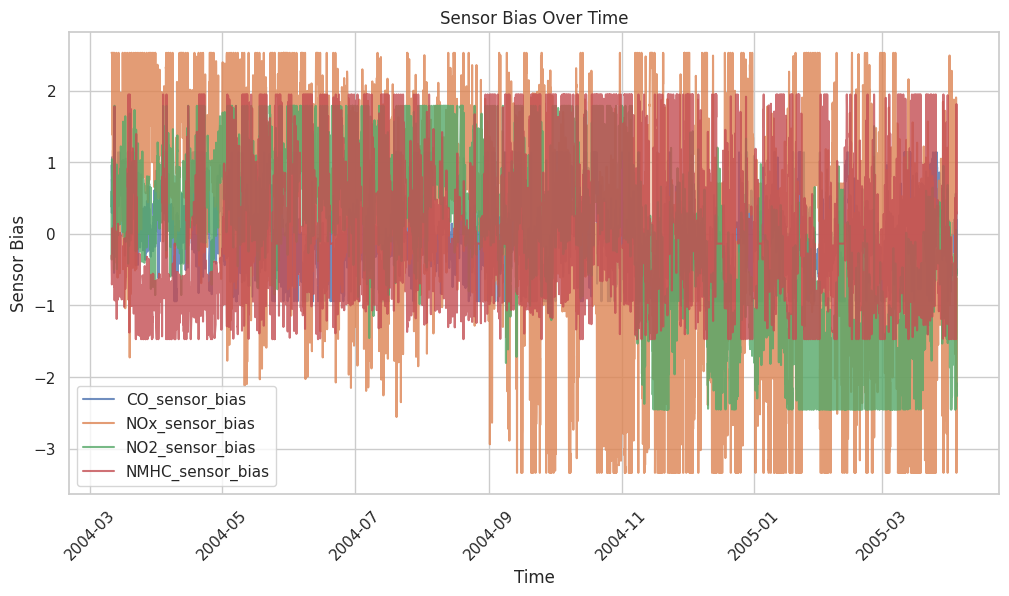

In [ ]:


# Set figure size
plt.figure(figsize=(12, 6))

# Plot sensor bias trends over time
for col in ['CO_sensor_bias', 'NOx_sensor_bias', 'NO2_sensor_bias', 'NMHC_sensor_bias']:
    plt.plot(df_transformed_no_outliers['Datetime'], df_transformed_no_outliers[col], label=col, alpha=0.8)

# Labels and title
plt.xlabel("Time")
plt.ylabel("Sensor Bias")
plt.title("Sensor Bias Over Time")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)

# Show plot
plt.show()


**Interferences**

---

1. CO Sensor Bias (Decrease from March to July, fluctuates till September, then remains stable).

  * Possible Interpretation:

    * The decreasing bias from March to July suggests that the CO sensor may have self-corrected or environmental conditions improved (e.g., lower emissions in summer).
    * The fluctuation from July to September could be due to changing pollution levels, possibly influenced by weather, traffic, or industrial activity.
    * The stability from September to March implies that either the sensor reached a steady-state calibration or CO pollution levels stabilized.

  * Potential Causes:

    * Seasonal changes (e.g., reduced heating emissions in summer, stable industrial activity in winter).
    * Calibration drift correction in the sensor.
    * Less vehicle pollution in later months.

2. NOx Sensor Bias (Fluctuates from March to May, rises till August, then drops drastically in September and remains low).

  * Possible Interpretation:

    * The rise from May to August suggests a period of increased NOx emissions, possibly due to summer traffic and industrial activity.
    * The sharp drop in September could be linked to seasonal regulation policies (e.g., emission control laws, reduced industrial output).
    * Remaining low until March 2005 indicates either a long-term decline in NOx levels or a sensor degradation issue.

  * Potential Causes:

    * Higher vehicular emissions in summer.
    * Government-mandated pollution control in September.
    * Temperature and weather changes affecting NOx stability.

3. NO2 Sensor Bias (Stable from March to November, then drops massively and stays low).

    * Possible Interpretation:

      * The long period of stability suggests that NO₂ pollution levels were relatively consistent or the sensor was well-calibrated.
      * The sharp decline in November might indicate either a sensor failure, a sudden environmental improvement, or strict pollution regulations kicking in.
      * Remaining at the bottom could mean the sensor stopped detecting NO₂ properly or pollution levels genuinely dropped.

    * Potential Causes:

      * A policy change around November (e.g., emission reductions).
      * Possible sensor malfunction (needs verification).
      * Weather conditions reducing NO₂ production.
  
4. NMHC Sensor Bias (Least deviation, remains unchanged throughout)

  * Possible Interpretation:

    * Minimal deviation suggests that either NMHC levels were naturally stable, or the sensor was highly consistent and reliable.
    * It could also mean low NMHC emissions variability in this location.
    * Another possibility is that the sensor had a low sensitivity to NMHC changes, leading to an artificially flat response.

  * Potential Causes:

    * Constant industrial emissions without significant peaks.
    * NMHC pollutants being less affected by seasonal/weather changes.
    * Sensor possibly being less responsive to minor fluctuations.


**Rush Hour vs. Pollution Levels (Box Plot)**

---

This graph compares pollution levels during rush hours versus non-rush hours, helping us see if traffic-related activities lead to significant spikes in pollution. It also shows how pollutants vary within and between the two time periods.

<ipython-input-19-c2e4cdf5be06>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df_transformed_no_outliers['RushHour'],
<ipython-input-19-c2e4cdf5be06>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Non-Rush (0)", "Rush (1)"])
<ipython-input-19-c2e4cdf5be06>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df_transformed_no_outliers['RushHour'],
<ipython-input-19-c2e4cdf5be06>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Non-Rush (0)", "Rush (1)"])
<ipython-i

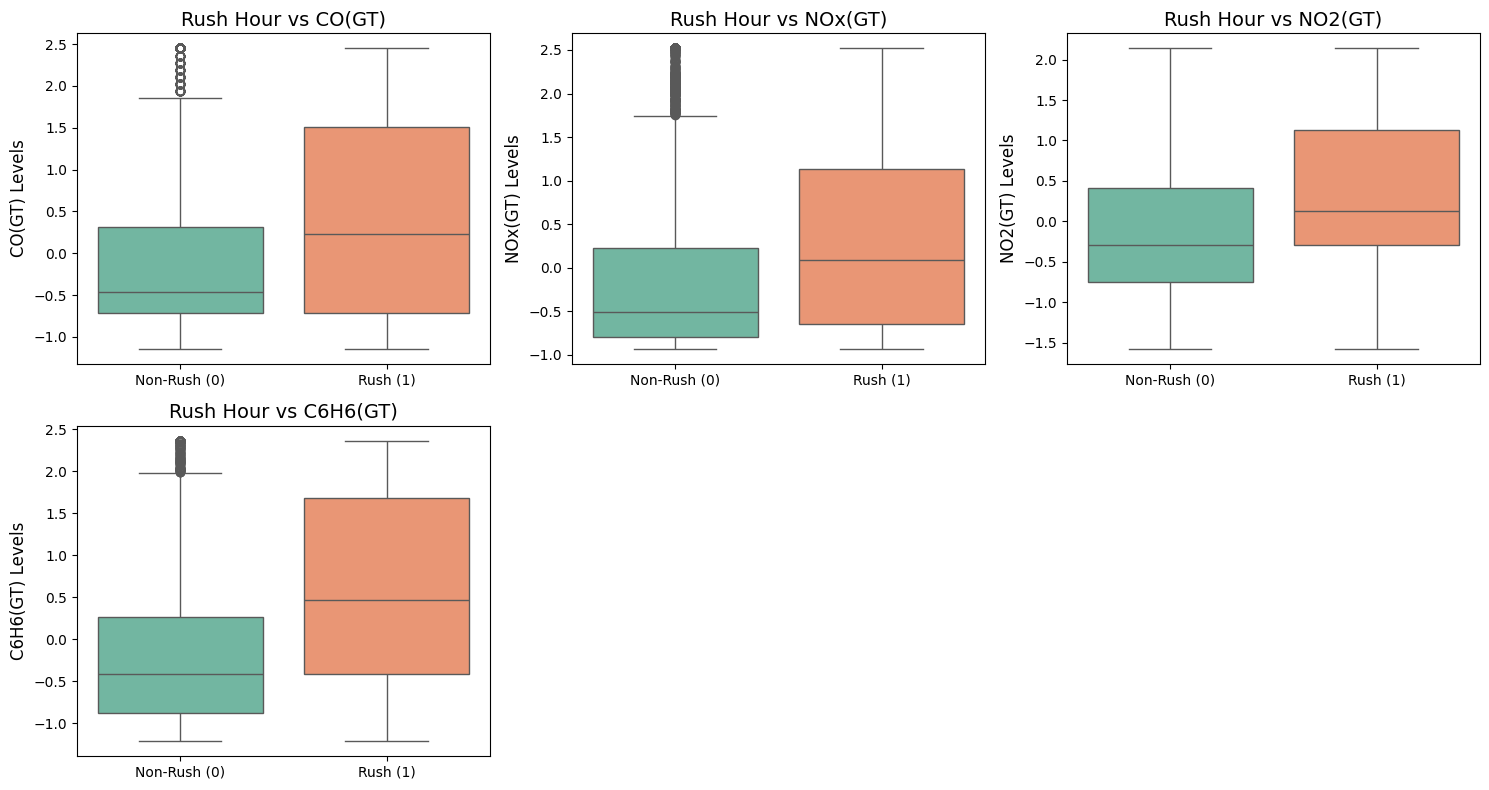

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define pollutants to analyze
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']

# Set figure size
plt.figure(figsize=(15, 8))

# Loop through pollutants to create subplots
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)  # Creating a grid layout (2 rows, 3 columns)
    ax = sns.boxplot(x=df_transformed_no_outliers['RushHour'],
                     y=df_transformed_no_outliers[pollutant],
                     palette="Set2")

    # Set custom x-axis labels directly below the boxes
    ax.set_xticklabels(["Non-Rush (0)", "Rush (1)"])

    # Formatting
    plt.xlabel("")  # Remove redundant xlabel
    plt.ylabel(f"{pollutant} Levels", fontsize=12)
    plt.title(f"Rush Hour vs {pollutant}", fontsize=14)

plt.tight_layout()
plt.show()


**Interferences**

---
1. Rush Hour Box Is Higher for Everything
    * This confirms that pollution levels are generally higher during rush hours. Traffic congestion leads to increased emissions from vehicles, raising pollutant concentrations.
    * If CO(GT), NO2(GT), and NOx(GT) show a significant rise, this strongly suggests vehicular emissions are a primary source.

2. Longer Whiskers for Rush Hour (More Outliers)
    * A wider spread means pollution levels fluctuate more during peak traffic. Some days see extreme pollution spikes (e.g., heavy congestion, weather conditions affecting dispersal).

3. Outliers Only for Non-Rush Hours
    * This suggests that during non-rush hours, pollution levels are mostly stable, but occasional extreme events (industrial activity, weather conditions, or unusual traffic patterns) cause sudden pollution spikes.

**Workday vs. Weekend Pollution (Box Plot)**

---
Here, we compare pollution levels between workdays and weekends to determine if industrial activities or transportation patterns significantly affect pollution on weekdays. This helps in identifying pollution-related behaviors on different days of the week.


<ipython-input-18-f95e3ea3e182>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df_transformed_no_outliers['IsWorkday'],
<ipython-input-18-f95e3ea3e182>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Weekend (0)", "Workday (1)"])
<ipython-input-18-f95e3ea3e182>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df_transformed_no_outliers['IsWorkday'],
<ipython-input-18-f95e3ea3e182>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Weekend (0)", "Workday (1)"])
<ipy

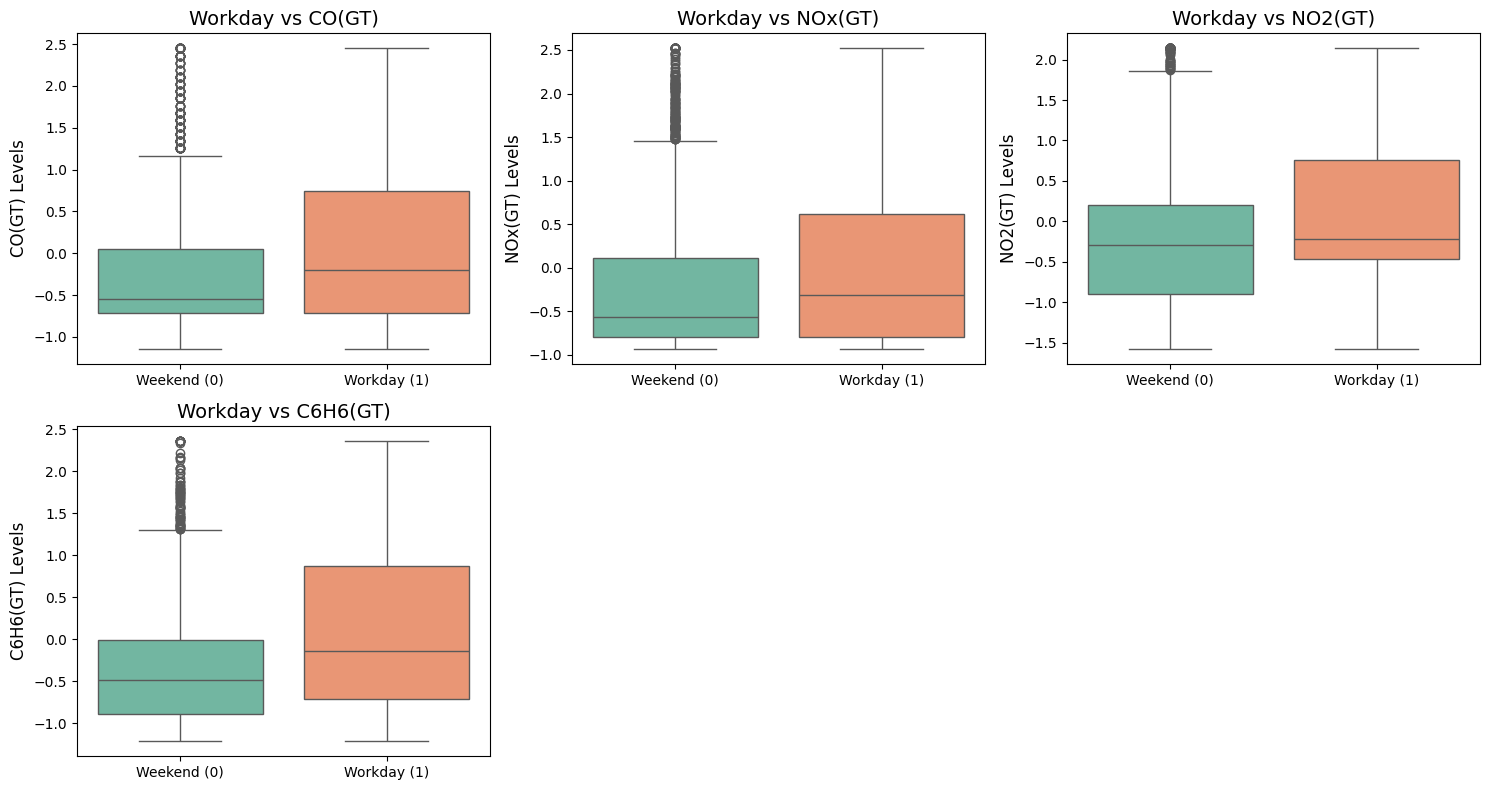

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define pollutants to analyze
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']

# Set figure size
plt.figure(figsize=(15, 8))

# Loop through pollutants to create subplots
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)  # Creating a grid layout (2 rows, 3 columns)
    ax = sns.boxplot(x=df_transformed_no_outliers['IsWorkday'],
                     y=df_transformed_no_outliers[pollutant],
                     palette="Set2")

    # Set custom x-axis labels directly below the boxes
    ax.set_xticklabels(["Weekend (0)", "Workday (1)"])

    # Formatting
    plt.xlabel("")  # Remove redundant xlabel
    plt.ylabel(f"{pollutant} Levels", fontsize=12)
    plt.title(f"Workday vs {pollutant}", fontsize=14)

plt.tight_layout()
plt.show()


**Interference**


---

1. Bigger Box for Weekdays → Higher Variability:

    * Pollution levels fluctuate more on workdays compared to weekends.
    * Possible reasons: Traffic congestion, industrial activity, and human mobility.
2. Longer Whiskers for Weekdays → More Extreme Values:

    * There are more extreme pollution levels during workdays.
    * Suggests that pollution peaks higher due to work-related emissions.


3. Outliers on Weekends Only → Unusual Pollution Events:

    * Pollution levels are more stable on weekends.
    * The outliers could indicate sporadic pollution events (e.g., weather changes, specific industrial operations, or local events).


**Pollution Accumulation Index (PAI) vs. Temperature & Humidity (Scatter Plot with Trend Line)**


---

This scatter plot examines the relationship between pollution accumulation and environmental factors like temperature and humidity. It helps us understand how weather conditions influence pollution levels and how these variables interact over time.

<ipython-input-93-e511fb7bc65b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed_no_outliers['PAI_Avg'] = df_transformed_no_outliers[['PAI_CO(GT)', 'PAI_C6H6(GT)', 'PAI_NOx(GT)', 'PAI_NO2(GT)']].mean(axis=1)


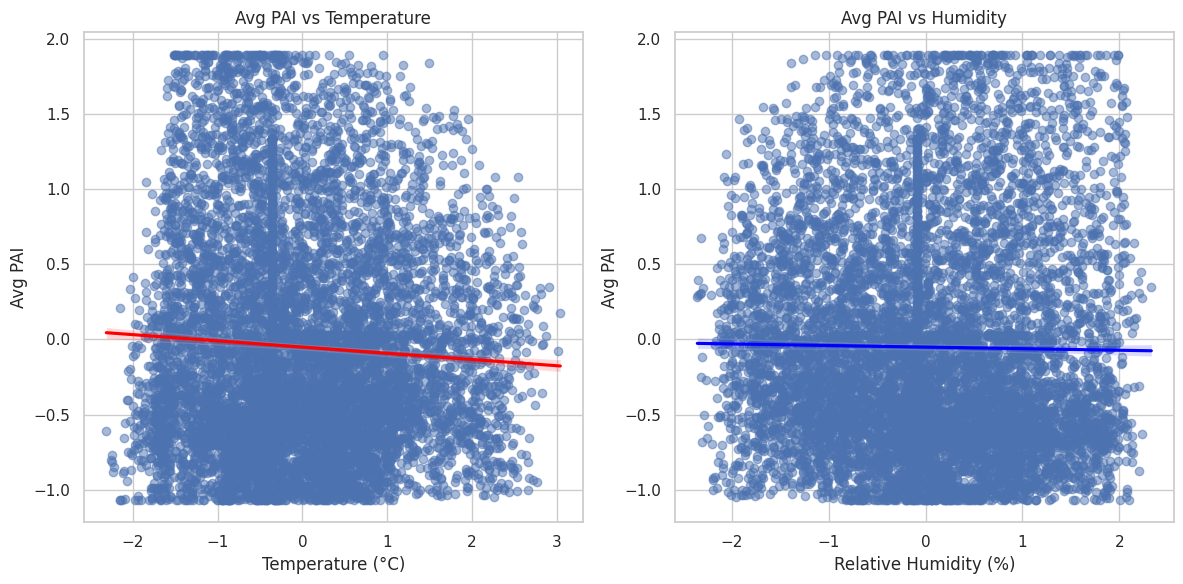

In [ ]:
df_transformed_no_outliers['PAI_Avg'] = df_transformed_no_outliers[['PAI_CO(GT)', 'PAI_C6H6(GT)', 'PAI_NOx(GT)', 'PAI_NO2(GT)']].mean(axis=1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=df_transformed_no_outliers['T'],
            y=df_transformed_no_outliers['PAI_Avg'],
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red'})
plt.xlabel('Temperature (°C)')
plt.ylabel('Avg PAI')
plt.title('Avg PAI vs Temperature')

plt.subplot(1, 2, 2)
sns.regplot(x=df_transformed_no_outliers['RH'],
            y=df_transformed_no_outliers['PAI_Avg'],
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'blue'})
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Avg PAI')
plt.title('Avg PAI vs Humidity')

plt.tight_layout()
plt.show()



**Interference**

---

1. Temperature vs. PAI (Left Plot)

    * More clustered points → Temperature has a stronger influence on PAI than humidity. The tighter spread suggests a clearer relationship between temperature and pollution accumulation.
    * More steeply negative slope → As temperature increases, PAI decreases more significantly. This suggests that higher temperatures might help disperse or break down pollutants more effectively.
    * Pointed end at the top → There could be a threshold effect, meaning at higher temperatures, pollution accumulation might sharply drop instead of decreasing gradually.

2. Humidity vs. PAI (Right Plot)

    * More scattered points → Humidity has a weaker influence on PAI compared to temperature. Other factors might be interfering with how humidity affects pollution levels.
    * Almost flat trend line → Humidity doesn’t have a strong direct effect on pollution accumulation, or its effect is inconsistent.
    * Flat shape at the top → Unlike temperature, high humidity levels don’t show a sharp drop in PAI, meaning it might not have as dramatic an effect on pollution reduction.

* What This Means
  * Temperature plays a bigger role in reducing pollution accumulation than humidity.
  * Humidity’s impact is weaker and less consistent, so other environmental or chemical factors might be affecting pollution at different humidity levels.
  * At high temperatures, pollution levels drop sharply, suggesting a possible threshold beyond which pollution disperses more effectively.

**Seasonal Pollution Levels (Bar Plot)**

---

This bar plot shows the average pollution levels across different seasons, highlighting seasonal trends. It reveals how pollutants such as CO, NOx, and NO2 behave differently depending on the time of year.





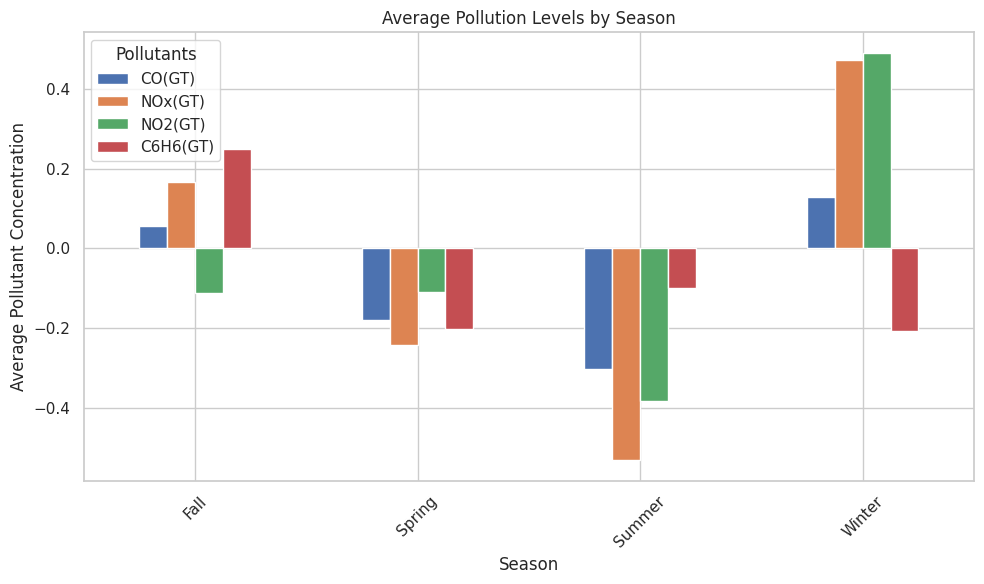

In [ ]:

# Calculate the mean concentration for each pollutant per season
mean_pollutants = df_transformed_no_outliers.groupby('Season')[['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']].mean()

# Plot bar plot
mean_pollutants.plot(kind='bar', figsize=(10, 6))
plt.title('Average Pollution Levels by Season')
plt.xlabel('Season')
plt.ylabel('Average Pollutant Concentration')
plt.xticks(rotation=45)
plt.legend(title='Pollutants')
plt.tight_layout()  # To ensure labels fit nicely
plt.show()


**Interfernces**

---

1. Fall Season:

* Positive Averages for all gases except NO2:

    * This suggests that in Fall, the concentration of most pollutants (like CO, NOx, and C6H6) is higher than the average concentration across all seasons. A positive Z-score indicates that the levels of these pollutants in Fall are significantly above the overall mean.
* Highest C6H6 (Benzene) levels:

  * Fall seems to have a particularly high concentration of C6H6 compared to other seasons. This could point to specific seasonal factors like higher vehicular emissions or industrial activity related to heating or preparation for winter.

2. Spring and Summer:

* Negative Averages for all gases:

    * Both Spring and Summer have lower-than-average pollutant concentrations across all gases (CO, NOx, NO2, C6H6). This suggests that air quality is relatively better during these seasons, with lower levels of pollution compared to the average for the entire year.

    * Negative values might indicate cleaner air during these seasons due to various factors like higher winds, more rainfall (which can help clear pollutants), or reduced industrial activity during these warmer months.

    * Summer could also benefit from increased vegetation (e.g., trees and plants), which absorb CO2 and other pollutants, contributing to better air quality.

3. Winter Season:
* Highest average in all gases except C6H6:
    * Winter has the highest concentrations of pollutants like CO, NOx, and NO2. This is typical as heating systems (burning fossil fuels) are in operation, and cold weather often traps pollutants in the air (a phenomenon known as temperature inversion).
    * The increased use of energy for heating and the presence of more stagnant air due to lower temperatures might lead to higher concentrations of these pollutants.
* Negative C6H6:
    * C6H6 levels being negative in Winter, while all other gases are positive, could indicate that there is a seasonal shift in the sources of benzene. In Winter, specific activities or weather patterns could reduce C6H6 emissions, or it could be a result of how pollution sources change.

**AQD Analysis**


---

Analyzed Air Quality Deviation (AQD) by computing pollutant fluctuations from their 24-hour rolling mean and visualizing time-based deviations to detect pollution spikes and trends.








<ipython-input-20-ecfaa3e62ebb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed_no_outliers[f'{pollutant}_RollingMean'] = df_transformed_no_outliers[pollutant].rolling(window=24, min_periods=1).mean()
<ipython-input-20-ecfaa3e62ebb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed_no_outliers[f'{pollutant}_AQD'] = df_transformed_no_outliers[pollutant] - df_transformed_no_outliers[f'{pollutant}_RollingMean']


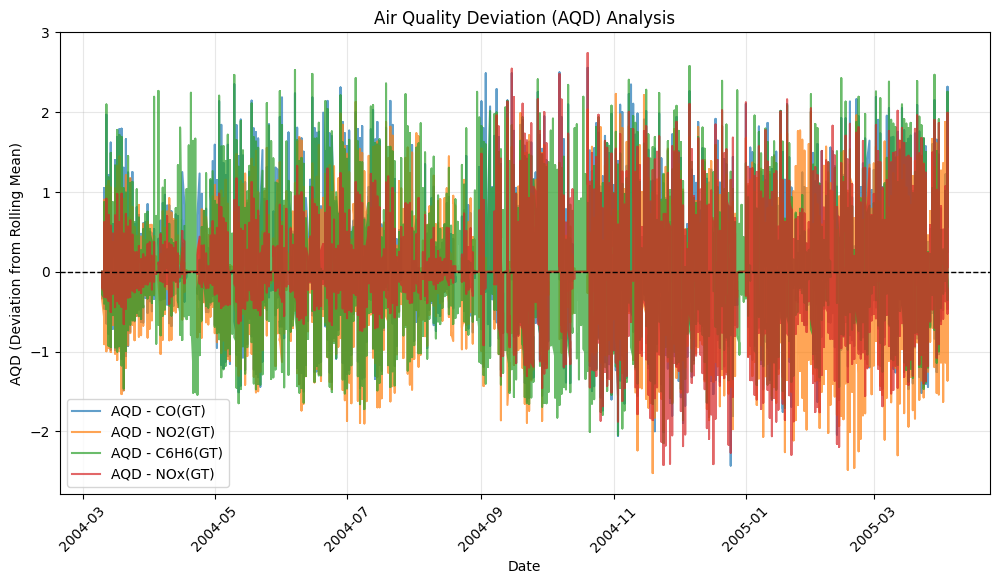

In [ ]:
plt.figure(figsize=(12, 6))

pollutants = ['CO(GT)', 'NO2(GT)', 'C6H6(GT)','NOx(GT)']  # Choose relevant pollutants

for pollutant in pollutants:
    # Compute rolling mean (24-hour window)
    df_transformed_no_outliers[f'{pollutant}_RollingMean'] = df_transformed_no_outliers[pollutant].rolling(window=24, min_periods=1).mean()

    # Compute deviation (AQD)
    df_transformed_no_outliers[f'{pollutant}_AQD'] = df_transformed_no_outliers[pollutant] - df_transformed_no_outliers[f'{pollutant}_RollingMean']

    # Plot AQD over time
    plt.plot(df_transformed_no_outliers['Date'], df_transformed_no_outliers[f'{pollutant}_AQD'], label=f'AQD - {pollutant}', alpha=0.7)

# Highlight zero deviation line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Date')
plt.ylabel('AQD (Deviation from Rolling Mean)')
plt.title('Air Quality Deviation (AQD) Analysis')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.show()


**Interferences**


---

1. NO₂ (Nitrogen Dioxide)

  * Observation: Stable until November 2004, then increased steadily till March 2005.

  * Inference: This trend suggests seasonal accumulation due to winter inversion, where colder temperatures trap pollutants closer to the surface. The increase could also indicate higher fuel combustion during winter, possibly from industrial sources, vehicular emissions, or heating systems.
2. CO (Carbon Monoxide)
  * Observation: Significant increase from November 2004 to January 2005.
  * Inference: This sharp rise is likely due to higher energy consumption in winter, as CO is produced from incomplete combustion of fossil fuels. Increased vehicle emissions and residential heating activities during colder months could be the main contributors.
3. C₆H₆ (Benzene)
  * Observation: Most dense plot, meaning values were relatively stable with little deviation.
  * Inference: The steady levels of benzene suggest consistent sources such as vehicular exhaust, industrial processes, and fuel evaporation. Unlike gases like CO and NO₂, benzene emissions might not be as affected by seasonal changes.
4. NOx (Nitrogen Oxides)

  * Observation: Very low until September 2004, then showed a massive increase from September 2004 to March 2005.
  * Inference: The late surge in NOx levels suggests a change in traffic patterns, industrial output, or environmental conditions. A possible explanation is increased fuel combustion and vehicular emissions in colder months. Additionally, seasonal wind patterns or reduced dispersion in winter might have contributed to this accumulation.

* Overall Inference:

    * Winter months (November–March) showed an overall increase in pollutant levels, likely due to seasonal factors like temperature inversion, increased fuel consumption, and reduced atmospheric dispersion.
    * CO and NO₂ saw sharp rises, indicating higher combustion-related activities during winter.
    * NOx levels increased drastically after September, suggesting a delayed but strong contribution from industrial and vehicular emissions.
    * Benzene remained stable, implying that its sources were relatively constant, primarily from traffic and industrial processes.
    * The combination of emissions and seasonal effects likely worsened air quality in the later months of the study period.

#  **General Summary of EDA**

---






1. Sensor Reliability and Bias Over Time:

    * Most sensors showed expected trends, with O3, CO, and NMHC following a strong positive linear relationship with their ground truth values, indicating reliability.
    * NOx exhibited an inverse relationship, which may suggest sensor drift, calibration issues, or cross-sensitivity with other gases.
    * NO2 showed a linear but widely spread relationship, indicating possible environmental influences or calibration inconsistencies.
    * Sensor bias varied over time, with CO stabilizing after fluctuations, NOx peaking in summer before dropping in September (likely due to seasonal regulations), and NO2 remaining steady before a sudden drop in winter.

2. Traffic and Pollution Patterns:

    * Rush hours saw higher pollution levels across all gases, confirming the direct impact of vehicular emissions. The variability was also greater, meaning some days had extreme pollution spikes.
    * Workdays had more pollution fluctuations than weekends, suggesting industrial and traffic emissions as key contributors. However, sporadic pollution spikes on weekends indicate occasional high-emission events.

3. Environmental Factors Affecting Pollution Accumulation:

    * Temperature had a stronger influence on pollution accumulation than humidity. Higher temperatures seemed to help disperse pollutants, leading to a steep decline in pollution accumulation beyond a certain threshold.
    * Humidity’s effect was weak and inconsistent, suggesting that other environmental or chemical interactions might be influencing pollution levels.

4. Seasonal Trends in Pollution:

    * Winter had the highest pollutant concentrations (except for Benzene) due to increased heating emissions and stagnant air trapping pollutants.
    * Fall had the highest Benzene (C6H6) levels, possibly due to seasonal industrial activity or specific vehicular emissions.
    * Spring and Summer had the lowest pollution levels overall, likely due to better atmospheric dispersion, increased vegetation absorption, and seasonal changes in industrial activity.


  * **Key Takeaways**

    * Traffic congestion and industrial emissions are the primary pollution drivers, especially during rush hours and weekdays.
    * Temperature plays a major role in dispersing pollutants, while humidity has a weaker, inconsistent effect.
    * Seasonal changes significantly impact pollution levels, with winter seeing the worst air quality due to heating emissions and stagnant air.
    * Certain sensors may need recalibration due to drift or inverse relationships with their ground truth values.